#Imports:

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
%matplotlib inline


## Load Dataset from sklearn

In [ ]:
name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath_or_buffer="/content/housing.csv",delim_whitespace=True,names=name)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: >

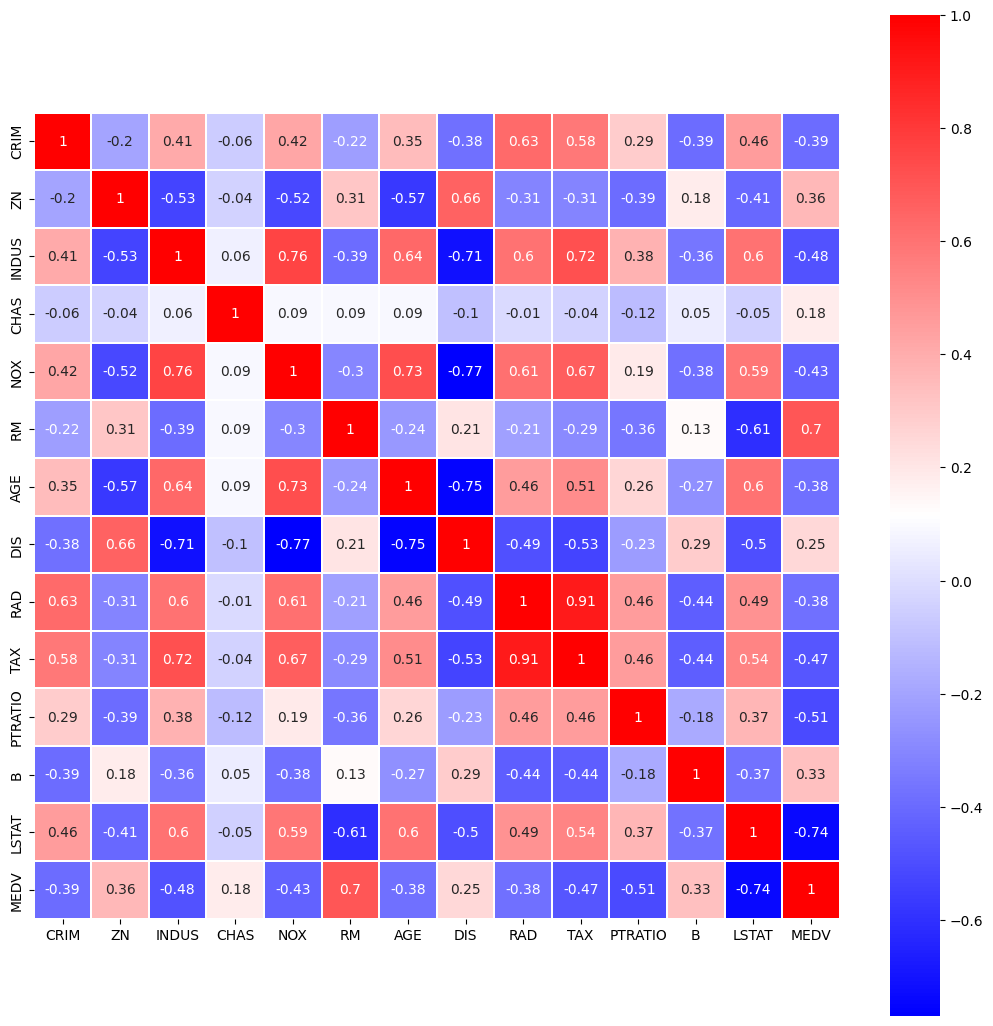

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.25,square=True,cmap='bwr')

## Selecting features having correlation with the MEDV:

In [ ]:
df_selected_features = df[['RM','PTRATIO','LSTAT','MEDV']]
df_selected_features.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


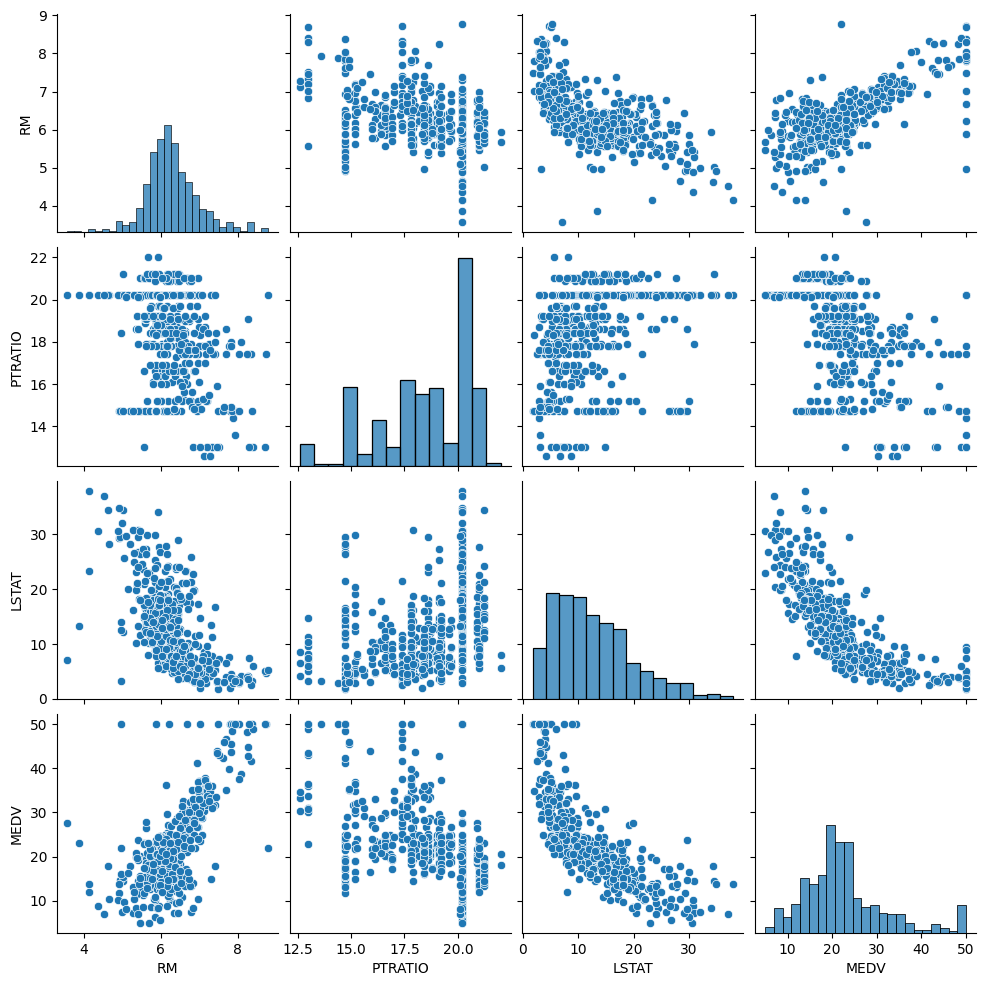

In [ ]:
sns.pairplot(data=df_selected_features)

# Pre-processing

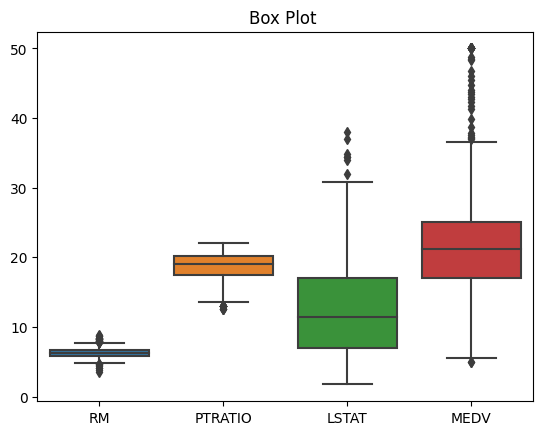

In [ ]:
sns.boxplot(df_selected_features)
plt.title('Box Plot ')
plt.show()

### Removing outliers:

In [ ]:
#Removing outliers from the dataset
out_col= ['MEDV','RM','LSTAT','PTRATIO']
if (set(out_col).issubset(df_selected_features.columns)):
            # 25% quantile
            Q1 = df_selected_features[out_col].quantile(.25)
            # 75% quantile
            Q3 = df_selected_features[out_col].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df_selected_features = df_selected_features[~((df_selected_features[out_col] < (Q1 - 3 * IQR)) |(df_selected_features[out_col] > (Q3 + 3 * IQR))).any(axis=1)]

In [ ]:
df_selected_features.shape

(489, 4)

### Handle the skewness:

In [ ]:
#log transformation: transform skewed distribution to a normal distribution.
for feature in ["LSTAT"]:
    df_selected_features[feature] = np.log(1+df_selected_features[feature])

<ipython-input-10-1e1b697a1c22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features[feature] = np.log(1+df_selected_features[feature])


# MODEL

In [ ]:
X = df_selected_features.drop(['MEDV'], axis = 1)
y = df_selected_features['MEDV']

In [ ]:
#Applying standard scaler on the 3 features
for i in X:    
    scale = StandardScaler().fit(X[[i]])
    X[i] = scale.transform(X[[i]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## SVR

In [ ]:
svr = svm.SVR()
svr.fit(X_train, y_train)

SVR()

#### Trainning Accuracy

In [ ]:
y_pred = svr.predict(X_train)
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.7671917328499989
MAE: 2.5935651022300905
MSE: 13.662524679071762
RMSE: 3.696285254018115


#### Testing Accuracy

In [ ]:
y_test_pred = svr.predict(X_test)
acc_svr = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_svr)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.7540264640101246
MAE: 2.9079373043993804
MSE: 18.20637129947101
RMSE: 4.266892464015353


## Random forest :

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

#### Training Accuracy

In [ ]:
y_pred = rf.predict(X_train)
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.9698356978249859
MAE: 0.9581432225063925
MSE: 1.770214296675189
RMSE: 1.3304940047498106


#### Testing Accuracy

In [ ]:
y_test_pred = rf.predict(X_test)
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_rf)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.8735976205328987
MAE: 2.334428571428571
MSE: 9.35600102040816
RMSE: 3.058758084649415


## XGBoost

In [ ]:
xg = XGBRegressor(n_estimators=10000, eta=0.1, max_depth=10,learning_rate=0.1)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

#### Training Accuracy

In [ ]:
y_pred = xg.predict(X_train)
print('R2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2: 0.9999999236518667
MAE: 0.0013586258949220985
MSE: 4.480546446554853e-06
RMSE: 0.002116730130780694


#### Testing Accuracy

In [ ]:
y_test_pred = xg.predict(X_test)
acc_xg = metrics.r2_score(y_test, y_test_pred)
print('R2:', acc_xg)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2: 0.8429499807094568
MAE: 2.478780137276163
MSE: 11.624465828349955
RMSE: 3.409467088615163


## All Models Evaluation:

In [ ]:

models = pd.DataFrame({
    'Model': ['SVR ', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_svr*100, acc_rf*100, acc_xg*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,87.359762
2,XGBoost,84.294998
0,SVR,75.402646
